In [1]:
import pandas as pd 
import numpy as np
import sklearn
import os
import gc
# parallel apply!
import swifter
from tqdm.autonotebook import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
data_dir = './data'

In [3]:
age_test_df = pd.read_csv(os.path.join(data_dir, "age_test.csv"), header=None)
age_train_df = pd.read_csv(os.path.join(data_dir, "age_train.csv"), header=None)
app_info_df = pd.read_csv(os.path.join(data_dir, "app_info.csv"), header=None)
user_app_actived_df = pd.read_csv(os.path.join(data_dir, "user_app_actived.csv"), header=None)
user_basic_info_df = pd.read_csv(os.path.join(data_dir, "user_basic_info.csv"), header=None)
user_behavior_info_df = pd.read_csv(os.path.join(data_dir, "user_behavior_info.csv"), header=None)
usage_summary_df = pd.read_csv(os.path.join(data_dir, "usages_summary.csv"))
user_app_usage = None

In [4]:
age_train_df.columns = ['uid', 'age_group']
age_test_df.columns = ['uid']
user_basic_info_df.columns = ['uid', 'gender', 'city', 'prodName', 'ramCap', 'ramLeft', 
                            'romCap', 'romLeft', 'color', 'fontSize', 'ct', 'carrier', 'os']
user_behavior_info_df.columns = ['uid', 'bootTimes', 'aTimes', 'bTimes', 'cTimes', 'dTimes', 
                                 'eTimes', 'fTimes', 'fSum']
user_app_actived_df.columns = ['uid', 'appId']
app_info_df.columns = ['appId', 'category']

In [5]:
import sklearn.preprocessing
def encodeCategory(df):
    encoder = sklearn.preprocessing.LabelEncoder()
    return encoder.fit_transform(df)

In [6]:
train_df = user_basic_info_df.merge(user_behavior_info_df, on='uid')\
            .merge(user_app_actived_df, on='uid')\
            .merge(age_train_df, on='uid', how='right')

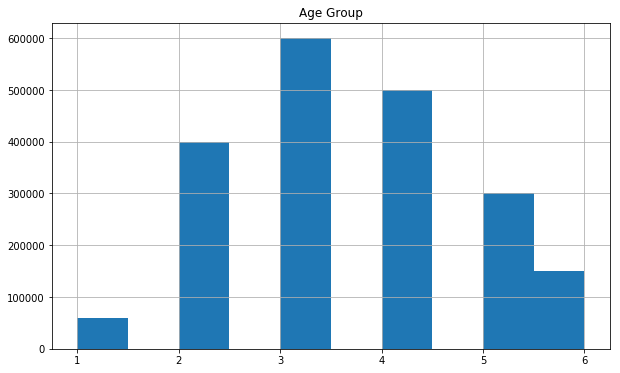

In [19]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca()
plt.title('Age Group')
train_df['age_group'].hist(ax=ax)

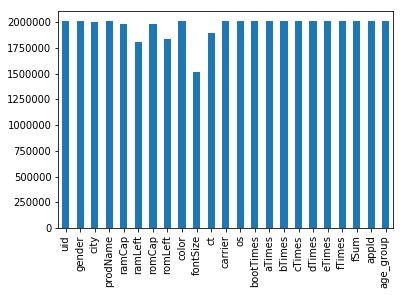

In [39]:
# missing values
train_df.count().plot(kind='bar')

In [8]:
train_df['total_app'] = train_df['appId'].progress_apply(
    lambda a: len(a.split('#')))

age_group
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_app, dtype: object

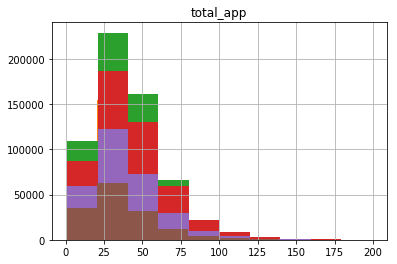

In [27]:
plt.title('total_app')
train_df[train_df.total_app < 200].groupby('age_group')['total_app'].hist()


In [22]:
# Usage 表无数据用户数
(usage_summary_df.drop('uid', axis=1).sum(axis=1) == 0).sum()

519833

In [37]:
train_df.columns

Index(['uid', 'gender', 'city', 'prodName', 'ramCap', 'ramLeft', 'romCap',
       'romLeft', 'color', 'fontSize', 'ct', 'carrier', 'os', 'bootTimes',
       'aTimes', 'bTimes', 'cTimes', 'dTimes', 'eTimes', 'fTimes', 'fSum',
       'appId', 'age_group'],
      dtype='object')